In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats,integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord,'distributions')))

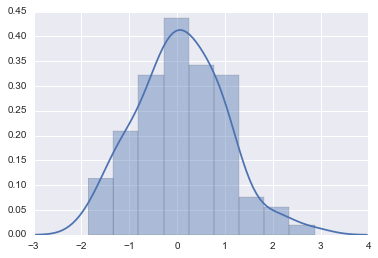

In [3]:
# Plot univariate distributions
x = np.random.normal(size=100)
sns.distplot(x);

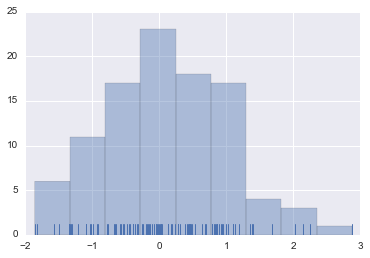

In [4]:
sns.distplot(x, kde=False, rug=True);

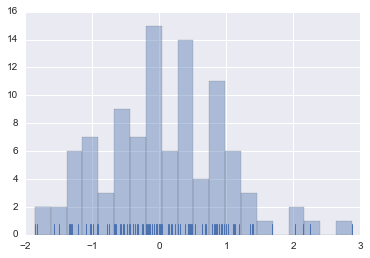

In [5]:
#use bins to make the numbers
sns.distplot(x,bins=20,kde=False,rug=True)

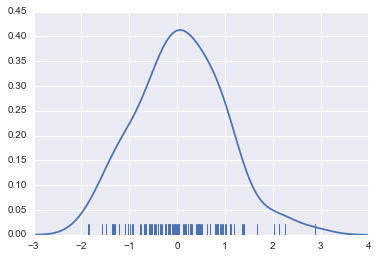

In [6]:
sns.distplot(x, hist=False, rug=True);

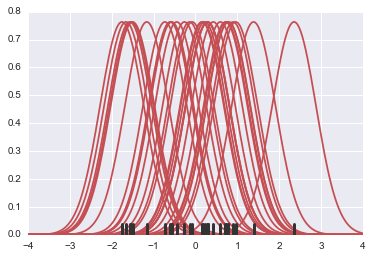

In [7]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1:

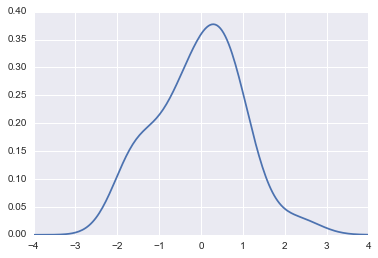

In [8]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

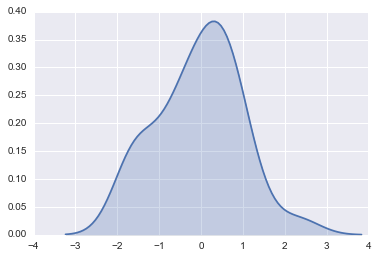

In [9]:
sns.kdeplot(x, shade=True);

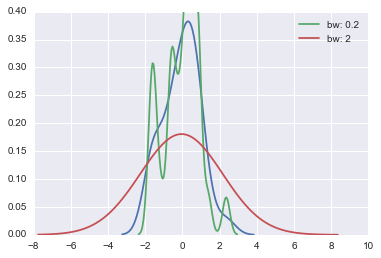

In [10]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

## Fitting parametric distributions

You can also use **distplot()** to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:

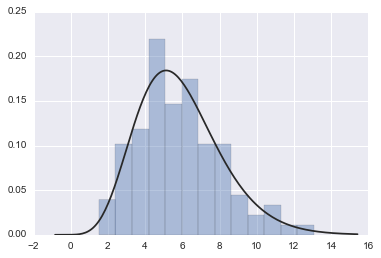

In [11]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

## 绘制多变量

使用jointplot()函数既可以显示两个变量之间的双变量（或关节）关系以及每个变量在单独轴上的单变量（或边际）分布。

In [12]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

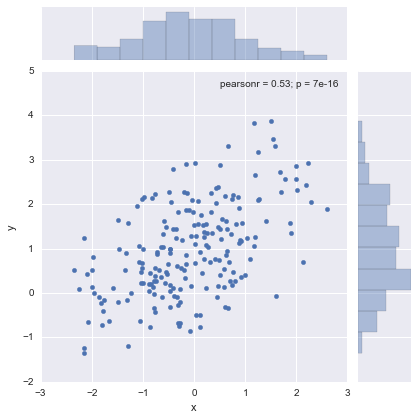

In [13]:
sns.jointplot(x="x", y="y", data=df);

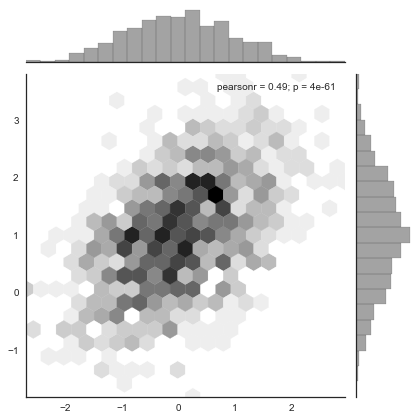

In [14]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

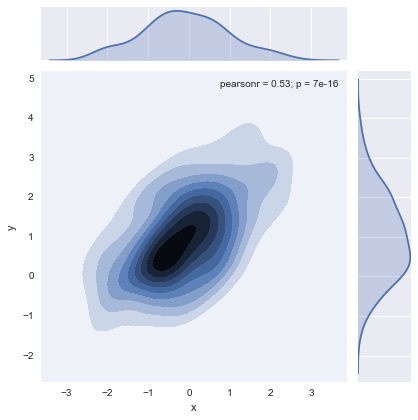

In [15]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

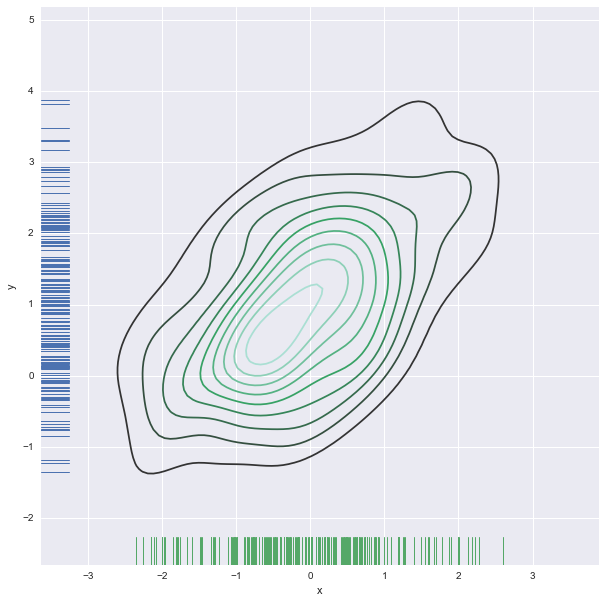

In [16]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

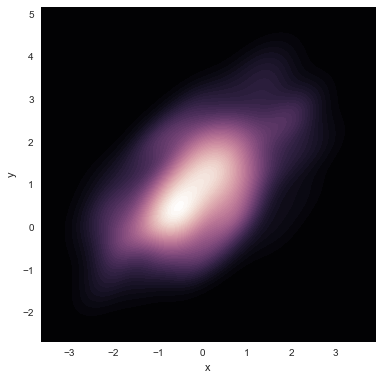

In [17]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

The jointplot() function uses a JointGrid to manage the figure

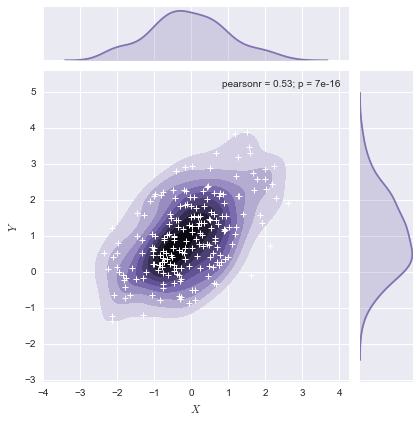

In [18]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

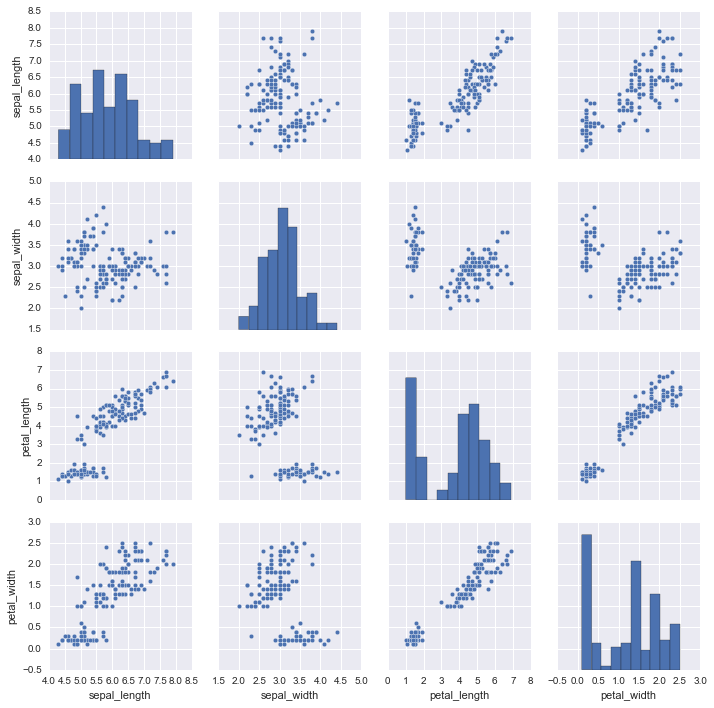

In [19]:
# 呈现数据集中成对的关系
iris = sns.load_dataset('iris')
sns.pairplot(iris)

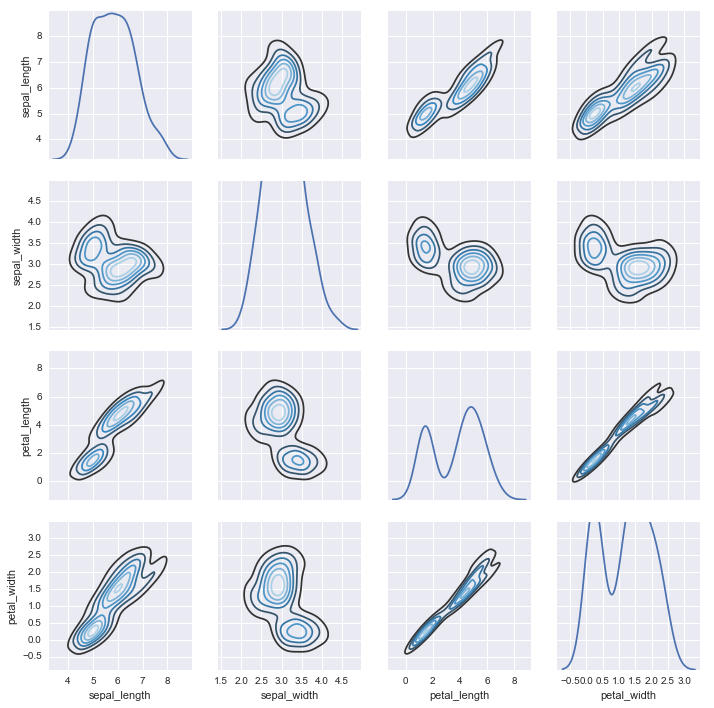

In [21]:
# 对于jointplot()和JointGrid之间的关系，pairplot()函数是建立在一个PairGrid对象上的，可以直接使用它来获得更大的灵活性：
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);